# GRIP-The Sparks Foundation

Prediction using Unsupervised ML

Abhay Singhal

Task-2----To predict the optimum number of clusters from Iris dataset and represent it visually


In [ ]:
!pip install seaborn

In [12]:
### importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
## reading data
data=pd.read_csv('Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
## List of features in the dataset
data.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [5]:
## To check if there are any Null values in the dataset

data.isna().head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [6]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So there are no Null values in the dataset.

In [14]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans

x = data.iloc[:,[0,1,2,3,4]].values
SSE=[]

for no_of_clusters in range(1,15):
    kmeans=KMeans(n_clusters=no_of_clusters,init='k-means++')
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

D:\anaconda\installed_anaconda_here\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


SSE denotes the inertia i.e. the sum of distances of all points within a cluster to its centroid is calculated and is repeated for all clusters and then their sum is taken which is denoted as *Inertia*

#### Elbow Method

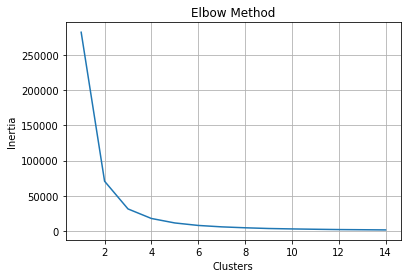

In [13]:
## plotting the above results
plt.plot(range(1,15),SSE)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title("Elbow Method")
plt.grid()
plt.show()

From the above graph we notice that the *Elbow* is attained when no. of clusters is 3 i.e from 3 the inertia doesn't decrease significantly

In [15]:
## Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
pred = kmeans.fit_predict(x)
df = pd.DataFrame(x)
df['cluster'] = pred
df['cluster'].value_counts()

0    50
1    50
2    50
Name: cluster, dtype: int64

This tells that cluster 3 has 50 points,cluster 2 has 50 points and similarly cluster 1 has 50 points.

### Clusters visualisation

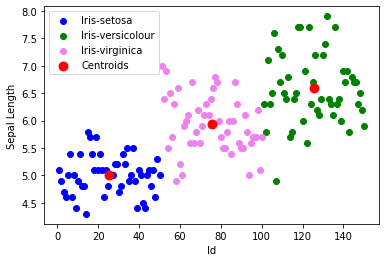

In [16]:
## Using Id and Sepal Length only
plt.scatter(x[pred == 0, 0], x[pred == 0, 1],c = 'blue', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1],c = 'green', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],c = 'violet', label = 'Iris-virginica')
plt.xlabel('Id')
plt.ylabel('Sepal Length')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=80, c = 'red', label = 'Centroids')

plt.legend()

In x[pred=0,0] the first zero represents the first cluster and the next 0 represents the Id and in x[pred=0,1] the 1 represents the Sepal Length similarly its repeated for other clusters

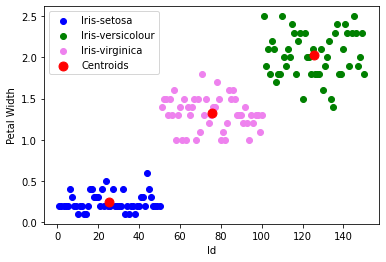

In [17]:
## Using Id and Petal Width only
plt.scatter(x[pred == 0, 0], x[pred == 0,4],c = 'blue', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1,4],c = 'green', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2,4],c = 'violet', label = 'Iris-virginica')
plt.xlabel('Id')
plt.ylabel('Petal Width')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,4],s=80, c = 'red', label = 'Centroids')

plt.legend()